# Modeling and Simulations Project 1

Studio 1

Jinfay Yuan & Jack Mao

In [69]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

from pandas import read_html

In [80]:
tables = read_html('https://en.wikipedia.org/wiki/United_States_immigration_statistics',
header=0,
decimal = '.',
index_col=0)

[Empty DataFrame
 Columns: [This article needs to be updated. Please update this article to reflect recent events or newly available information. (November 2010)]
 Index: [],
                                        2000      1990      1980     1970  \
 Region and country or area                                                 
 Total                              31107889  19767316  14079906  9619302   
 Reported by region and/or country  31107573  18959158  13192563  9303570   
 Europe                              4915557   4350403   5149572  5740891   
 Northern and Western Europe         2070446   2058853   2384257  2629200   
 Northern Europe                      974619    968271   1083499  1271591   
 British Isles                        834225    809972    866966   937474   
 United Kingdom (total)               677715    640145    669149   686099   
 Great Britain (total)                677751    623614    649318   645262   
 England                              423609    405588 

In [81]:
table2 = tables[1]

,2000,1990,1980,1970,1960,1950,1920,1910,1900,1890,1880,1870,1860,1850
Region and country or area,,,,,,,,,,,,,,
Total,31107889,19767316,14079906,9619302,9738091,14204149,13920692,13515886,10341276,9249547,6679943,5567229,4138697,2244602
Reported by region and/or country,31107573,18959158,13192563,9303570,9678201,14197553,13911767,13506272,10330534,9243535,6675875,5563637,4134809,2202625
Europe,4915557,4350403,5149572,5740891,7256311,11784010,11916048,11810115,8881548,8030347,5751823,4941049,3807062,2031867
Northern and Western Europe,2070446,2058853,2384257,2629200,3334971,5850256,6241916,7306325,7204649,7288917,5499889,4845679,3773347,2022195
Northern Europe,974619,968271,1083499,1271591,1694430,3415551,3501149,3953947,3917815,4056160,3212431,2867926,2271661,1358887
British Isles,834225,809972,866966,937474,1171777,2147733,2172723,2573534,2783082,3122911,2772169,2626241,2199079,1340812
United Kingdom (total),677715,640145,669149,686099,833055,1402923,(X),(X),(X),(X),(X),(X),(X),(X)
Great Britain (total),677751,623614,649318,645262,764893,1224091,1135489,1221283,1167623,1251402,917598,770414,587775,379093
England,423609,405588,442499,458114,528205,809563,813853,877719,840513,908141,662676,550924,431692,278675


In [82]:
table2.index.get_loc('China')

56

In [113]:
China = table2.loc['China']
China = China.reindex(index=China.index[::-1])

index = China.index.astype(float)
values = China.values.astype(float)

china = TimeSeries(data = values, index = index)

,values
1850.0,758.0
1860.0,35565.0
1870.0,63042.0
1880.0,104468.0
1890.0,106688.0
1900.0,81534.0
1910.0,56756.0
1920.0,43560.0
1950.0,46129.0
1960.0,99735.0


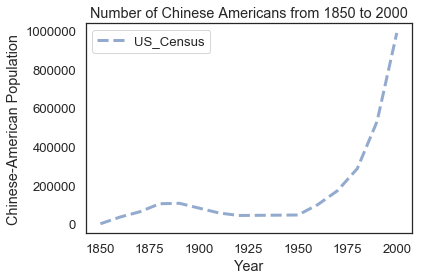

In [116]:
plot(china, '--',label='US_Census')
decorate(xlabel='Year', 
            ylabel='Chinese-American Population',
            title="Number of Chinese Americans from 1850 to 2000")